In [1]:
import pandas as pd

In [2]:
teams=pd.read_csv("/kaggle/input/aaravdata/teams.csv")

In [3]:


teams=teams.dropna()

In [4]:
teams=teams[["team","country","year","athletes","age","prev_medals","medals"]]
teams

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


In [5]:
teams_num=teams.select_dtypes(include=["float", "int64"])

In [6]:
print(teams_num)

      year  athletes   age  prev_medals  medals
0     1964         8  22.0          0.0       0
1     1968         5  23.2          0.0       0
2     1972         8  29.0          0.0       0
3     1980        11  23.6          0.0       0
4     2004         5  18.6          0.0       0
...    ...       ...   ...          ...     ...
2139  2000        26  25.0          0.0       0
2140  2004        14  25.1          0.0       3
2141  2008        16  26.1          3.0       4
2142  2012         9  27.3          4.0       0
2143  2016        31  27.5          0.0       0

[2014 rows x 5 columns]


In [7]:
teams_num.corr()

,year,athletes,age,prev_medals,medals
year,1.000000,-0.078059,-0.013355,-0.017917,-0.034870
athletes,-0.078059,1.000000,0.035079,0.810576,0.839909
age,-0.013355,0.035079,1.000000,0.032596,0.023231
prev_medals,-0.017917,0.810576,0.032596,1.000000,0.920048
medals,-0.034870,0.839909,0.023231,0.920048,1.000000


<Axes: xlabel='age', ylabel='medals'>

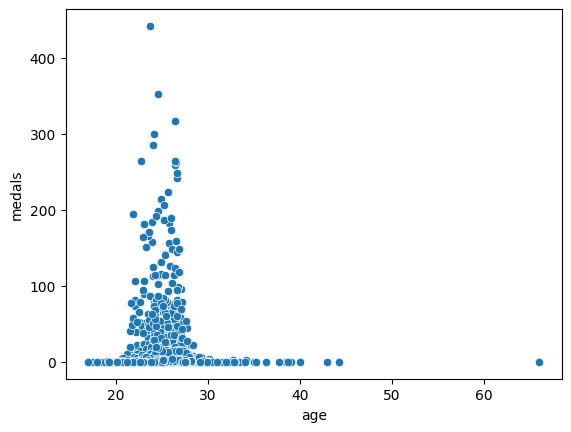

In [8]:
import seaborn as sns
sns.scatterplot(x="age",y="medals",data=teams)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


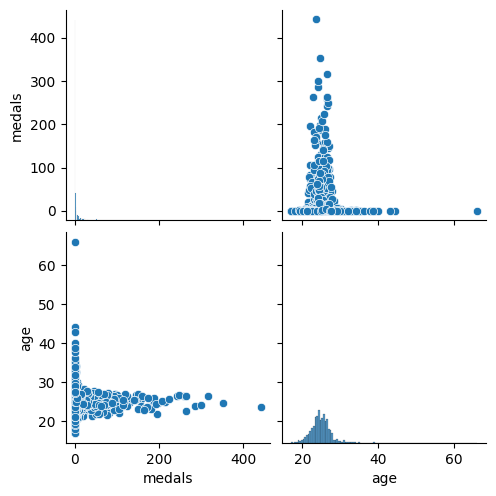

In [9]:
sns.pairplot(teams_num[['medals', 'age']])

In [10]:
from sklearn.feature_selection import mutual_info_regression

X = teams_num[['age']]
y = teams_num['medals']
mi = mutual_info_regression(X, y)
print("Mutual Information:", mi[0])

Mutual Information: 0.0760608359664472


<Axes: ylabel='Frequency'>

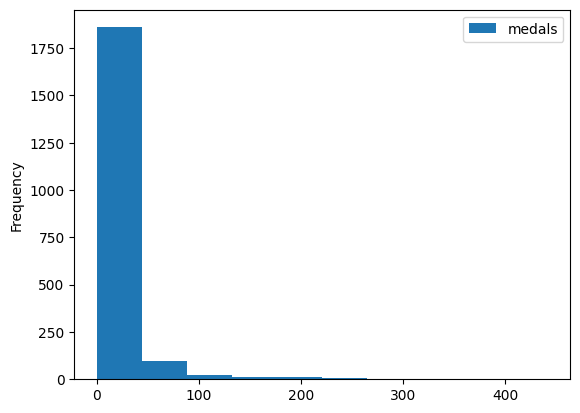

In [11]:
teams.plot.hist(y="medals")

In [12]:
train=teams[teams["year"]<2012].copy()

test=teams[teams["year"]>=2012].copy()
print(test)

     team      country  year  athletes   age  prev_medals  medals
6     AFG  Afghanistan  2012         6  24.8          1.0       1
7     AFG  Afghanistan  2016         3  24.7          1.0       0
24    ALB      Albania  2012        10  25.7          0.0       0
25    ALB      Albania  2016         6  23.7          0.0       0
37    ALG      Algeria  2012        39  24.8          2.0       1
...   ...          ...   ...       ...   ...          ...     ...
2111  YEM        Yemen  2016         3  19.3          0.0       0
2131  ZAM       Zambia  2012         7  22.6          0.0       0
2132  ZAM       Zambia  2016         7  24.1          0.0       0
2142  ZIM     Zimbabwe  2012         9  27.3          4.0       0
2143  ZIM     Zimbabwe  2016        31  27.5          0.0       0

[405 rows x 7 columns]


In [13]:
train.shape
test.shape

(405, 7)

In [14]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
predictors=["athletes","prev_medals"]

target="medals"

reg.fit(train[predictors],train[target])
LinearRegression()
predictions=reg.predict(test[predictors])


print(test)

     team      country  year  athletes   age  prev_medals  medals
6     AFG  Afghanistan  2012         6  24.8          1.0       1
7     AFG  Afghanistan  2016         3  24.7          1.0       0
24    ALB      Albania  2012        10  25.7          0.0       0
25    ALB      Albania  2016         6  23.7          0.0       0
37    ALG      Algeria  2012        39  24.8          2.0       1
...   ...          ...   ...       ...   ...          ...     ...
2111  YEM        Yemen  2016         3  19.3          0.0       0
2131  ZAM       Zambia  2012         7  22.6          0.0       0
2132  ZAM       Zambia  2016         7  24.1          0.0       0
2142  ZIM     Zimbabwe  2012         9  27.3          4.0       0
2143  ZIM     Zimbabwe  2016        31  27.5          0.0       0

[405 rows x 7 columns]


In [15]:
predictions.shape

(405,)

In [16]:
for i in range(405):
    if predictions[i] < 0:
        predictions[i] = 0

predictions=predictions.round()


test["predictions"]=predictions
test

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,0.0
7,AFG,Afghanistan,2016,3,24.7,1.0,0,0.0
24,ALB,Albania,2012,10,25.7,0.0,0,0.0
25,ALB,Albania,2016,6,23.7,0.0,0,0.0
37,ALG,Algeria,2012,39,24.8,2.0,1,2.0
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,0.0
2131,ZAM,Zambia,2012,7,22.6,0.0,0,0.0
2132,ZAM,Zambia,2016,7,24.1,0.0,0,0.0
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,2.0


In [17]:
from sklearn.metrics import mean_absolute_error
error = mean_absolute_error(test["medals"],test["predictions"])
error

3.2987654320987656

In [18]:
test[teams["team"]=="IND"]

<ipython-input-18-6261ff4f5df2>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test[teams["team"]=="IND"]


,team,country,year,athletes,age,prev_medals,medals,predictions
907,IND,India,2012,95,26.0,3.0,6,7.0
908,IND,India,2016,130,26.1,6.0,2,12.0


In [19]:
 error_byteam= test["predictions"]- test["medals"]

test["error_byteam"]=abs(error_byteam)
test

,team,country,year,athletes,age,prev_medals,medals,predictions,error_byteam
6,AFG,Afghanistan,2012,6,24.8,1.0,1,0.0,1.0
7,AFG,Afghanistan,2016,3,24.7,1.0,0,0.0,0.0
24,ALB,Albania,2012,10,25.7,0.0,0,0.0,0.0
25,ALB,Albania,2016,6,23.7,0.0,0,0.0,0.0
37,ALG,Algeria,2012,39,24.8,2.0,1,2.0,1.0
...,...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,0.0,0.0
2131,ZAM,Zambia,2012,7,22.6,0.0,0,0.0,0.0
2132,ZAM,Zambia,2016,7,24.1,0.0,0,0.0,0.0
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,2.0,2.0


In [20]:
error_ratio=test["error_byteam"]/test["medals"]
test["error_ratio"]=error_ratio
test

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,team,country,year,athletes,age,prev_medals,medals,predictions,error_byteam,error_ratio
6,AFG,Afghanistan,2012,6,24.8,1.0,1,0.0,1.0,1.0
7,AFG,Afghanistan,2016,3,24.7,1.0,0,0.0,0.0,NaN
24,ALB,Albania,2012,10,25.7,0.0,0,0.0,0.0,NaN
25,ALB,Albania,2016,6,23.7,0.0,0,0.0,0.0,NaN
37,ALG,Algeria,2012,39,24.8,2.0,1,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,0.0,0.0,NaN
2131,ZAM,Zambia,2012,7,22.6,0.0,0,0.0,0.0,NaN
2132,ZAM,Zambia,2016,7,24.1,0.0,0,0.0,0.0,NaN
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,2.0,2.0,inf


In [21]:
test=test.dropna()
test

,team,country,year,athletes,age,prev_medals,medals,predictions,error_byteam,error_ratio
6,AFG,Afghanistan,2012,6,24.8,1.0,1,0.0,1.0,1.000000
37,ALG,Algeria,2012,39,24.8,2.0,1,2.0,1.0,1.000000
38,ALG,Algeria,2016,74,24.0,1.0,2,4.0,2.0,1.000000
80,ARG,Argentina,2012,148,27.4,51.0,19,47.0,28.0,1.473684
81,ARG,Argentina,2016,232,27.5,19.0,22,29.0,7.0,0.318182
...,...,...,...,...,...,...,...,...,...,...
2060,UZB,Uzbekistan,2016,80,25.7,3.0,13,6.0,7.0,0.538462
2081,VEN,Venezuela,2012,85,26.3,1.0,1,5.0,4.0,4.000000
2082,VEN,Venezuela,2016,105,27.5,1.0,3,6.0,3.0,1.000000
2091,VIE,Vietnam,2016,28,26.9,0.0,2,0.0,2.0,1.000000


In [22]:
test=test[test["error_ratio"]<2000]
test

,team,country,year,athletes,age,prev_medals,medals,predictions,error_byteam,error_ratio
6,AFG,Afghanistan,2012,6,24.8,1.0,1,0.0,1.0,1.000000
37,ALG,Algeria,2012,39,24.8,2.0,1,2.0,1.0,1.000000
38,ALG,Algeria,2016,74,24.0,1.0,2,4.0,2.0,1.000000
80,ARG,Argentina,2012,148,27.4,51.0,19,47.0,28.0,1.473684
81,ARG,Argentina,2016,232,27.5,19.0,22,29.0,7.0,0.318182
...,...,...,...,...,...,...,...,...,...,...
2059,UZB,Uzbekistan,2012,56,25.4,6.0,3,6.0,3.0,1.000000
2060,UZB,Uzbekistan,2016,80,25.7,3.0,13,6.0,7.0,0.538462
2081,VEN,Venezuela,2012,85,26.3,1.0,1,5.0,4.0,4.000000
2082,VEN,Venezuela,2016,105,27.5,1.0,3,6.0,3.0,1.000000
